In [19]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np



In [20]:
!pip install --upgrade pandas
!pip install --upgrade pandas-dataReader

In [21]:
!pip install pandas-dataReader

In [22]:
#visualisation imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import seaborn as sns
%matplotlib inline

In [23]:
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime

In [24]:
tech_list = ['AAPL','GOOG','MSFT', 'AMZN']

In [25]:
end = datetime.now()

In [26]:
start = datetime(end.year-1, end.month, end.day)

In [27]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'yahoo', start, end)

In [28]:
AMZN

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-09,167.744003,166.425995,167.180496,167.093506,42964000.0,167.093506
2021-08-10,167.899994,165.750000,167.250504,166.033997,48252000.0,166.033997
2021-08-11,166.884995,163.889496,166.572495,164.605499,58944000.0,164.605499
2021-08-12,165.725494,163.483505,164.500000,165.175003,46282000.0,165.175003
2021-08-13,165.303497,164.149994,165.283493,164.698502,41134000.0,164.698502
...,...,...,...,...,...,...
2022-08-02,137.440002,134.089996,134.720001,134.160004,61922400.0,134.160004
2022-08-03,140.490005,136.050003,136.210007,139.520004,71827800.0,139.520004
2022-08-04,143.559998,139.550003,140.580002,142.570007,70585000.0,142.570007


In [29]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,152.521274,148.120205,150.371698,150.271834,7.271161e+07,150.271834
std,23.113014,23.658036,23.445944,23.328033,3.125020e+07,23.328033
min,104.580002,101.260002,102.750000,102.309998,3.070435e+07,102.309998
25%,137.597496,133.234997,134.854996,134.752499,5.377300e+07,134.752499
50%,161.655746,157.459503,159.403000,159.438248,6.482630e+07,159.438248
75%,170.785378,166.469627,168.502377,169.024754,8.279950e+07,169.024754
max,188.107498,183.785995,185.634506,184.802994,2.726620e+08,184.802994


In [30]:
AAPL['Company'] = 'APPLE'
AMZN['Company'] = 'AMAZON'
MSFT['Company'] = 'MICROSOFT'
GOOG['Company'] = 'GOOGLE'

In [31]:
stocks = pd.concat([AAPL,AMZN,GOOG,MSFT])

In [32]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2021-08-09,146.699997,145.520004,146.199997,146.089996,48908700.0,145.275940,APPLE
2021-08-10,147.710007,145.300003,146.440002,145.600006,69023100.0,144.788681,APPLE
2021-08-11,146.720001,145.529999,146.050003,145.860001,48493500.0,145.047226,APPLE
2021-08-12,149.050003,145.839996,146.190002,148.889999,72282600.0,148.060333,APPLE
2021-08-13,149.440002,148.270004,148.970001,149.100006,59375000.0,148.269180,APPLE


In [33]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2021-08-09 to 2022-08-08
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1008 non-null   float64
 1   Low        1008 non-null   float64
 2   Open       1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Volume     1008 non-null   float64
 5   Adj Close  1008 non-null   float64
 6   Company    1008 non-null   object 
dtypes: float64(6), object(1)
memory usage: 63.0+ KB


In [34]:
stocks.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Company      0
dtype: int64

In [35]:
stocks.duplicated().sum()
 

0

what was a change in a stock price over time?

In [37]:
companies = stocks['Company'].drop_duplicates().values
print(companies)

['APPLE' 'AMAZON' 'GOOGLE' 'MICROSOFT']


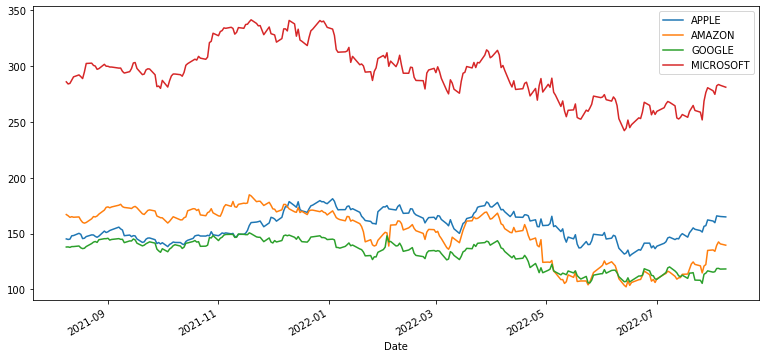

In [38]:
grouped = stocks.groupby('Company')
fig, ax = plt.subplots()
for comp in companies:
    stock = grouped.get_group(comp)
    stock['Adj Close'].plot(legend = True, figsize=(13,6), ax=ax)
ax.legend(companies)

price trend of individual stocks

<AxesSubplot:title={'center':"Amazon's stock trend"}, xlabel='Date'>

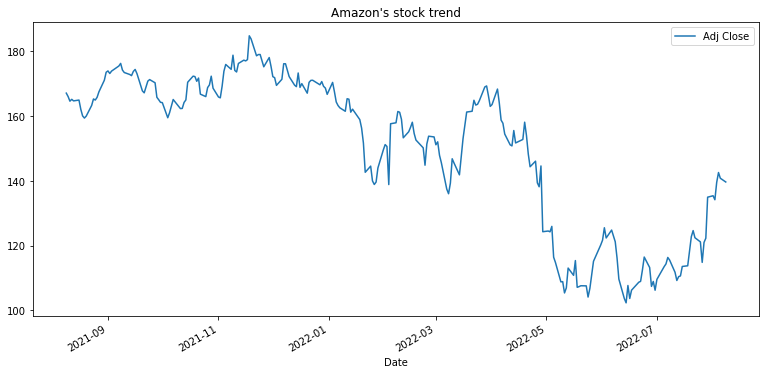

In [39]:
AMZN['Adj Close'].plot(legend= True, figsize=(13,6),title = "Amazon's stock trend")

<AxesSubplot:title={'center':"Google's stock trend"}, xlabel='Date'>

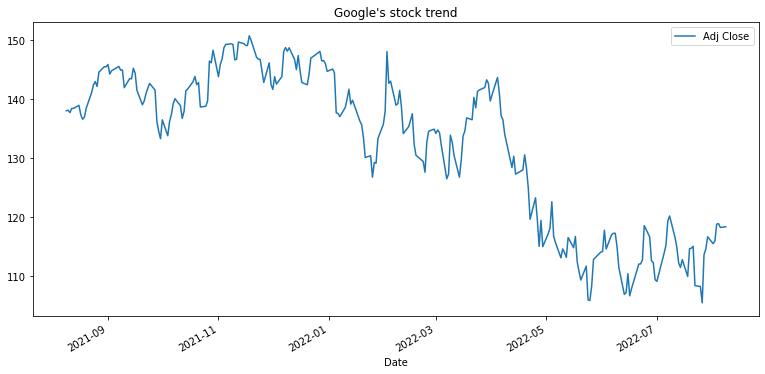

In [40]:
GOOG['Adj Close'].plot(legend= True, figsize = (13,6), title = "Google's stock trend")

visualise the change in a stock's volume being traded, over time

<AxesSubplot:xlabel='Date'>

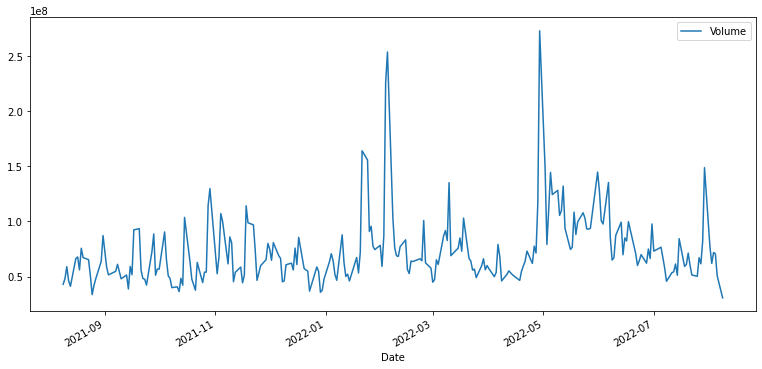

In [41]:
AMZN['Volume'].plot(legend=True, figsize = (13,6))

<AxesSubplot:xlabel='Date'>

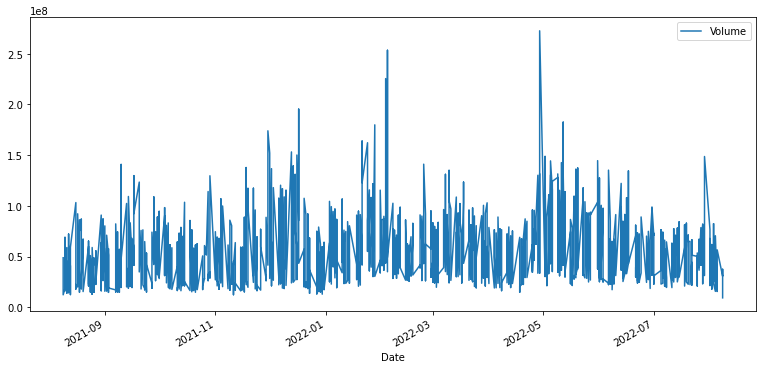

In [42]:
stocks['Volume'].plot(legend=True, figsize = (13,6))

what was the moving average of various stocks?

In [43]:
moving_Avg = [10,30,50]
for avg in moving_Avg:
    column_name = "MA for %s days" %(str(avg))
    AMZN[column_name] = AMZN['Adj Close'].rolling(window = avg, center = False).mean()

In [45]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 10 days,MA for 30 days,MA for 50 days
Date,,,,,,,,,,
2022-08-02,137.440002,134.089996,134.720001,134.160004,61922400.0,134.160004,AMAZON,125.351999,116.419333,115.05763
2022-08-03,140.490005,136.050003,136.210007,139.520004,71827800.0,139.520004,AMAZON,127.027000,117.447333,115.69621
2022-08-04,143.559998,139.550003,140.580002,142.570007,70585000.0,142.570007,AMAZON,128.821001,118.568000,116.39647
2022-08-05,142.860001,139.600006,140.100006,140.800003,50650100.0,140.800003,AMAZON,130.659001,119.513334,117.13047
2022-08-08,144.229996,139.009995,142.050003,139.645004,30704352.0,139.645004,AMAZON,132.509502,120.286167,117.78787


<AxesSubplot:xlabel='Date'>

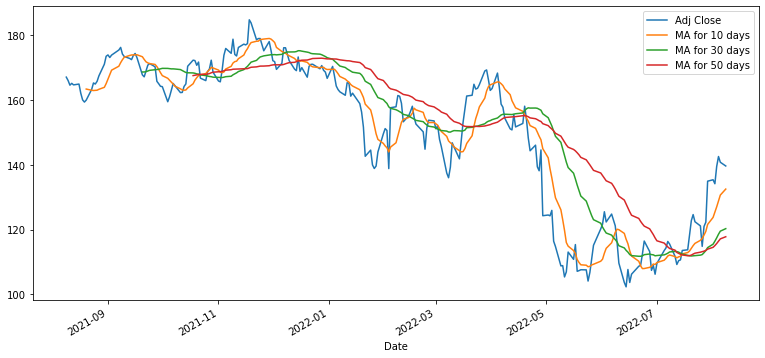

In [48]:
AMZN[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days']].plot(subplots = False, figsize =(13,6))

what was daily run average of a stock?

In [49]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
AMZN['Daily Return'].tail()

Date
2022-08-02   -0.009085
2022-08-03    0.039952
2022-08-04    0.021861
2022-08-05   -0.012415
2022-08-08   -0.008203
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

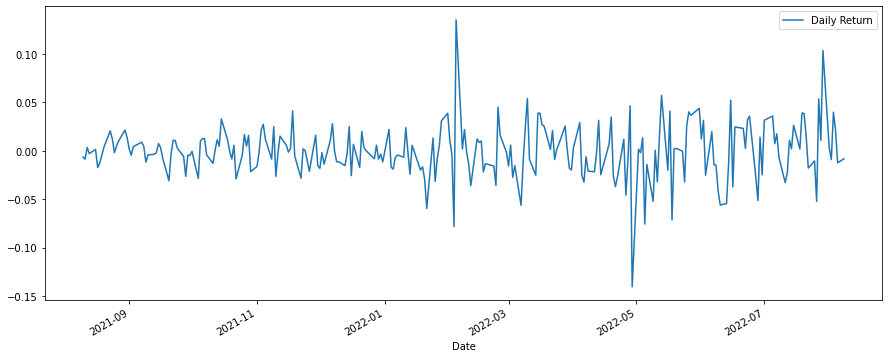

In [50]:
AMZN['Daily Return'].plot(figsize=(15,6), legend = True)

C:\Users\07shr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return'>

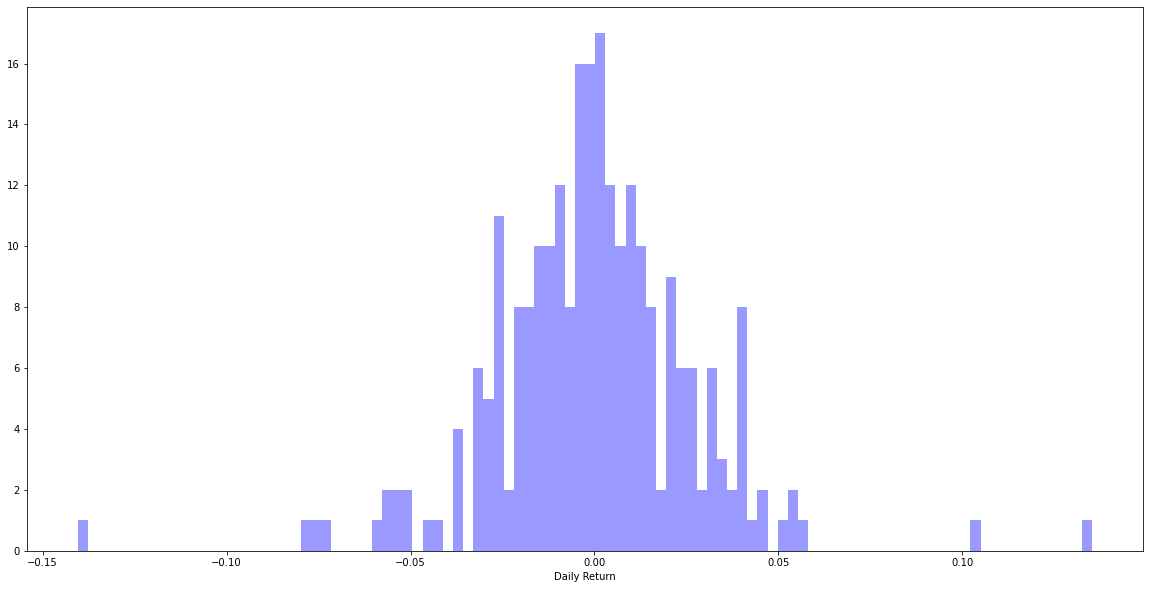

In [52]:
f, ax = plt.subplots(figsize=(20,10))
sns.distplot(AMZN['Daily Return']. dropna(), bins = 100, color = 'blue', kde = False, ax=ax)

Add a new column trend whose values are based on the daily return

In [55]:
def trend(x):
    if x> -0.015 and x<= 0.015:
        return 'slight or no change'
    elif x> 0.015 and x<= 0.04:
        return 'slight positive'
    elif x< -0.015 and x >= -0.4:
        return 'slight negative'
    elif x> 0.04 and x<= 0.06:
        return 'positive'
    elif x< -0.04 and x>= -0.06:
        return 'negative'
    elif x> 0.06 and x<= 0.07:
        return 'Among top gainers'
    elif x>0.07:
        return 'Bull run'
    elif x<= -0.07:
        return 'Bear drop'
AMZN['Trend'] = np.zeros(AMZN['Daily Return'].count()+1)
AMZN['Trend'] = AMZN['Daily Return'].apply(lambda x: trend(x))
AMZN.tail(5)

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 10 days,MA for 30 days,MA for 50 days,Daily Return,Trend
Date,,,,,,,,,,,,
2022-08-02,137.440002,134.089996,134.720001,134.160004,61922400.0,134.160004,AMAZON,125.351999,116.419333,115.05763,-0.009085,slight or no change
2022-08-03,140.490005,136.050003,136.210007,139.520004,71827800.0,139.520004,AMAZON,127.027000,117.447333,115.69621,0.039952,slight positive
2022-08-04,143.559998,139.550003,140.580002,142.570007,70585000.0,142.570007,AMAZON,128.821001,118.568000,116.39647,0.021861,slight positive
2022-08-05,142.860001,139.600006,140.100006,140.800003,50650100.0,140.800003,AMAZON,130.659001,119.513334,117.13047,-0.012415,slight or no change
2022-08-08,144.229996,139.009995,142.050003,139.645004,30704352.0,139.645004,AMAZON,132.509502,120.286167,117.78787,-0.008203,slight or no change


Text(0.5, 1.0, 'trend frequency using a pie chart')

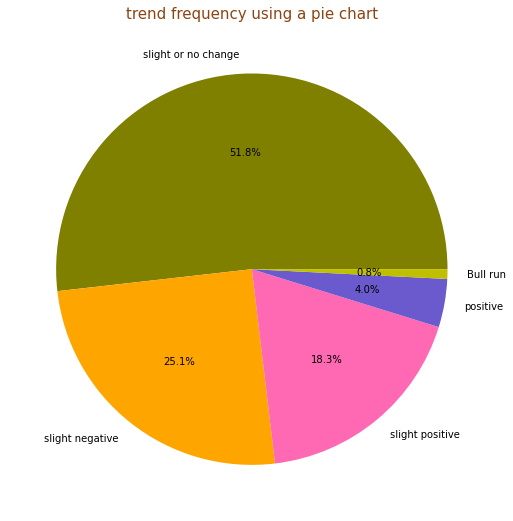

In [57]:
labels  = AMZN.Trend.value_counts().index
colors =["olive", "orange", "hotpink", "slateblue", "y", "lime"]
sizes = AMZN.Trend.value_counts().values
plt.figure(figsize=(9,9))
plt.pie(sizes, labels = labels, colors = colors, autopct="%1.1f%%")
plt.title("trend frequency using a pie chart", color = "saddlebrown", fontsize = 15)

In [58]:
all_adj = pd.concat([AAPL['Adj Close'], AMZN['Adj Close'], GOOG['Adj Close'], MSFT['Adj Close']], axis=1)
all_adj.columns =['APPLE','GOOGLE','MICROSOFT', 'AMAZON']
all_adj

,APPLE,GOOGLE,MICROSOFT,AMAZON
Date,,,,
2021-08-09,145.275940,167.093506,138.001999,285.994690
2021-08-10,144.788681,166.033997,138.096497,284.119995
2021-08-11,145.047226,164.605499,137.689499,284.625885
2021-08-12,148.060333,165.175003,138.389496,287.462708
2021-08-13,148.269180,164.698502,138.406006,290.478119
...,...,...,...,...
2022-08-02,159.788040,134.160004,115.900002,274.820007
2022-08-03,165.899567,139.520004,118.779999,282.470001
2022-08-04,165.580002,142.570007,118.870003,283.649994


In [60]:
pct_df= all_adj.pct_change()
pct_df.tail()

,APPLE,GOOGLE,MICROSOFT,AMAZON
Date,,,,
2022-08-02,-0.009287,-0.009085,0.003637,-0.011474
2022-08-03,0.038248,0.039952,0.024849,0.027836
2022-08-04,-0.001926,0.021861,0.000758,0.004177
2022-08-05,-0.001389,-0.012415,-0.005468,-0.002609
2022-08-08,-0.002207,-0.008203,0.001015,-0.006009


<AxesSubplot:>

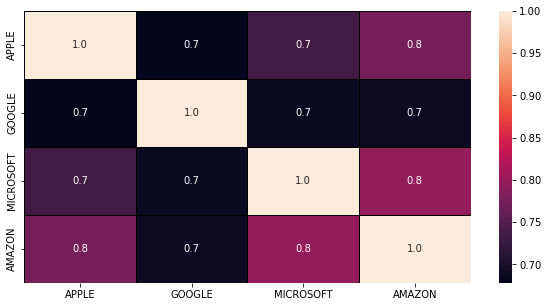

In [61]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(pct_df.corr(), annot = True, linewidth = 0.5, linecolor = "black", fmt = ".1f", ax= ax)